<a href="https://colab.research.google.com/github/vishumestha/Python-Machine-Learning/blob/master/Anomaly_Detection_Using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Data Manipulation Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#

### Loading the data 

In [0]:
creditcardfraud = pd.read_csv("https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv")

### Data Preparation for training 

In [0]:
creditcardfraud_norm = creditcardfraud
creditcardfraud_norm['Time'] = StandardScaler().fit_transform(creditcardfraud_norm['Time'].values.reshape(-1, 1))
creditcardfraud_norm['Amount'] = StandardScaler().fit_transform(creditcardfraud_norm['Amount'].values.reshape(-1, 1))

RANDOM_SEED=52
test_size=0.2
train_x, test_x = train_test_split(creditcardfraud_norm, test_size=test_size, random_state=RANDOM_SEED)
train_x = train_x[train_x.Class == 0] #where normal transactions
train_x = train_x.drop(['Class'], axis=1) #drop the class column


test_y = test_x['Class'] #save the class column for the test set
test_x = test_x.drop(['Class'], axis=1) #drop the class column

#train_x = train_x.values #transform to ndarray
#test_x = test_x.values

In [0]:
Class PCA:
  def __init__(self,n_componets):
    self.n_compoents=n_componets
    
  def fit(self,Xdata):
    cov=train_x.corr()
    U,S,V=np.linalg.svd byhi(cov)   

In [0]:
X = np.matrix(train_x)
cov = (X.T * X) / X.shape[0]
U, S, V = np.linalg.svd(cov)
#Select the n_components such that 90% of variance is retained

In [0]:
pca_thresh=0
pca_components=np.argmax(np.cumsum(S/S.sum())>=pca_thresh)
tm=np.dot(X,U[:,:pca_components+1])

In [0]:
t_square=np.power(tm,2)/S[0:pca_components+1]

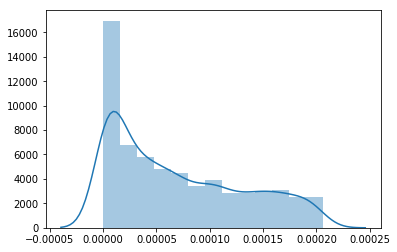

In [0]:
import seaborn as sns
threshold=np.percentile(t_square,0.98)
sns.distplot([x  for xby in t_square if x <=threshold])

In [0]:
from sklearn.decomposition import PCA
pca_model=PCA(n_components=20)
pca_model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca_model.explained_variance_

array([3.8379489 , 3.09222426, 2.50810017, 2.02118434, 1.96942622,
       1.77813911, 1.47563025, 1.35052958, 1.20576435, 1.16902841,
       1.12023263, 0.99871265, 0.98033384, 0.86763855, 0.82357149,
       0.75475075, 0.71963034, 0.66955322, 0.6475566 , 0.57159291])

In [0]:
S

array([3.83795682, 3.09222013, 2.50809758, 2.02121223, 1.96943818,
       1.77814187, 1.47568116, 1.35052379, 1.20575908, 1.16903122,
       1.12026431, 0.99870934, 0.98033441, 0.86763474, 0.82361552,
       0.75475216, 0.71962783, 0.66955027, 0.64755625, 0.57159083,
       0.51876446, 0.42892718, 0.38052188, 0.3668875 , 0.23465412,
       0.21539057, 0.15648635, 0.11959123, 0.10771155, 0.04362207])

In [0]:
pca_model.explained_variance_ratio_

array([0.12327507, 0.09932236, 0.08056027, 0.06492052, 0.06325805,
       0.0571139 , 0.0473973 , 0.04337906, 0.0387292 , 0.03754924,
       0.03598192, 0.03207869, 0.03148836, 0.02786858, 0.02645315,
       0.02424262, 0.02311455, 0.02150608, 0.02079954, 0.01835959,
       0.01666274, 0.01377721, 0.01222243, 0.01178448, 0.00753713,
       0.00691837, 0.00502624, 0.00381267, 0.00345954, 0.00140114])

In [0]:
S/S.sum()

array([0.1232712 , 0.09931891, 0.0805575 , 0.06491924, 0.06325631,
       0.05711207, 0.04739735, 0.04337742, 0.03872773, 0.03754807,
       0.03598173, 0.03207751, 0.03148733, 0.02786753, 0.02645368,
       0.02424186, 0.0231137 , 0.02150526, 0.02079884, 0.01835891,
       0.01666218, 0.0137767 , 0.01222197, 0.01178405, 0.00753685,
       0.00691812, 0.00502618, 0.00384115, 0.00345958, 0.0014011 ])

In [0]:
pca_model.singular_values_

array([934.32774905, 838.65848498, 755.30453496, 678.03578612,
       669.29797484, 635.96398325, 579.34655371, 554.24489866,
       523.69794879, 515.6585052 , 504.78188736, 476.61743969,
       472.21159919, 444.24144461, 432.81300749, 414.33481668,
       404.57997641, 390.24936376, 383.78546381, 360.5728901 ,
       343.50638575, 312.35056143, 294.19847904, 288.87959771,
       231.02796032, 221.34191591, 188.66146146, 164.31464743,
       156.52040472,  99.609821  ])

In [0]:
pca_model.noise_variance_

import scipy.stats

print scipy.stats.f.isf(0.98, p, n-p)

0.2571664285703722

In [0]:
#I can calculate the confidence limit for T^2 test in matlab with
#T2Upper=p*(n-1)/(n-p)*finv(0.98,p,n-p)here p =PCs,n= sample number"
#like this how can I calculate the confidence limits for Q test?
n=X.shape[0]
p=


import scipy.stats
T2Upper=p*(n-1)/(n-p)*scipy.stats.f.isf(0.98,p,n-p); 


In [0]:
T2Upper

73.17003213786138

In [0]:
U.shape

(30, 30)

In [0]:
pca_model.